In [1]:
# Install required packages

!pip install ultralytics -q

!pip install transformers -q

!pip install networkx -q

!pip install kaggle -q

!pip install kagglehub -q

!pip install pyyaml -q

!pip install pyvis -q

!pip install supervision -q

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.utils import check_data_config

# This runs the check and returns the path
DATA_YAML = check_data_config()

Config found: /workspace/dl4cv-final-project/sku110k_fixed.yaml
--------------------
names:
  0: product
path: /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed
test: images/test
train: images/train
val: images/val

--------------------


In [3]:
from src.tuning import run_hyperparameter_tuning

# YOLOv11 Large
MODEL_WEIGHT = "yolo11l.pt"

print(f"Launching YOLO Large Hyperparameter Tuning on {MODEL_WEIGHT}...")

# --- RUN TUNING ---
results = run_hyperparameter_tuning(
    model_type="YOLO",
    model_weight=MODEL_WEIGHT,
    data_yaml=DATA_YAML,
    iterations=3,
    epochs=10,
    project_dir="../runs/yolov11l/tune",
    batch_size=16
)

print("YOLO Large Tuning Complete. Results saved in ../runs/yolov11l/tune")

Launching YOLO Large Hyperparameter Tuning on yolo11l.pt...
Starting Tuning for YOLO (yolo11l.pt)...
   Target: 3 iterations of 10 epochs each.
Tuner: Initialized Tuner instance with 'tune_dir=/workspace/dl4cv-final-project/runs/yolov11l/tune/tune_YOLO_yolo11l'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/3 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'box': 0.2, 'cls': 0.5, 'hsv_h': 0.015, 'mosaic': 1.0, 'mixup': 0.0}
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=0.2, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/dl4cv-final-project/sku110k_fixed.yaml, degrees=0.0, deterministic=True, devi

In [4]:
from src.visualization import print_best_hyperparameters, show_tuning_plots, print_tuning_csv

# Path to the folder named "tune_YOLO_yolo11l" (contains yaml/pngs)
SUMMARY_DIR = "../runs/yolov11l/tune/tune_YOLO_yolo11l"

print_best_hyperparameters(SUMMARY_DIR)

BEST HYPERPARAMETERS
# 3/3 iterations complete ✅ (2771.00s)
# Results saved to /workspace/dl4cv-final-project/runs/yolov11l/tune/tune_YOLO_yolo11l
# Best fitness=0.57717 observed at iteration 1
# Best fitness metrics are {'metrics/precision(B)': 0.9034, 'metrics/recall(B)': 0.82817, 'metrics/mAP50(B)': 0.89844, 'metrics/mAP50-95(B)': 0.57717, 'val/box_loss': 0.03465, 'val/cls_loss': 0.56234, 'val/dfl_loss': 0.98431, 'fitness': 0.57717}
# Best fitness model is /workspace/dl4cv-final-project/runs/yolov11l/tune/train
lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
box: 0.2
cls: 0.5
hsv_h: 0.015
mosaic: 1.0
mixup: 0.0



Global Tuning Plots:
--- tune_fitness.png ---


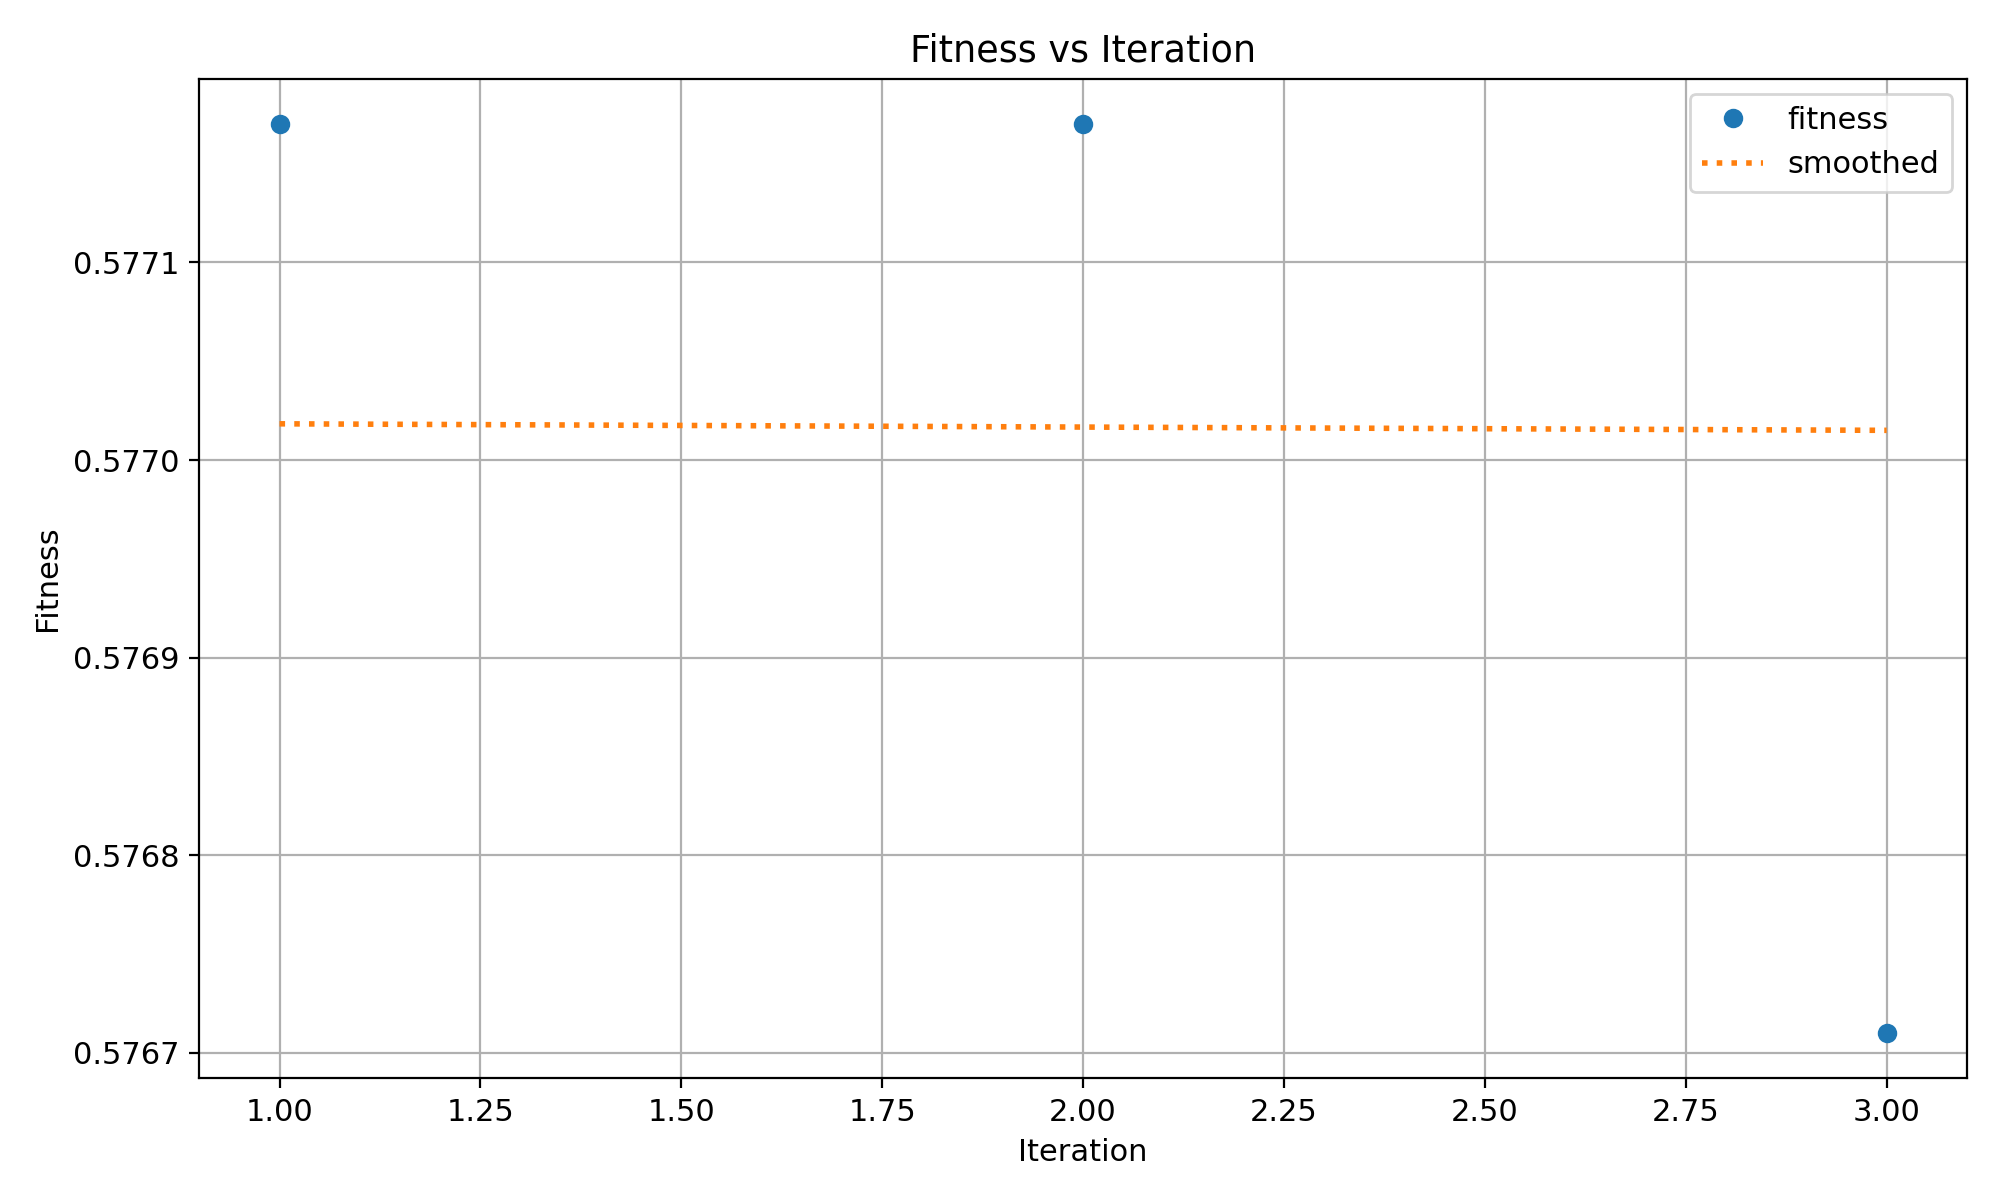

--- tune_scatter_plots.png ---


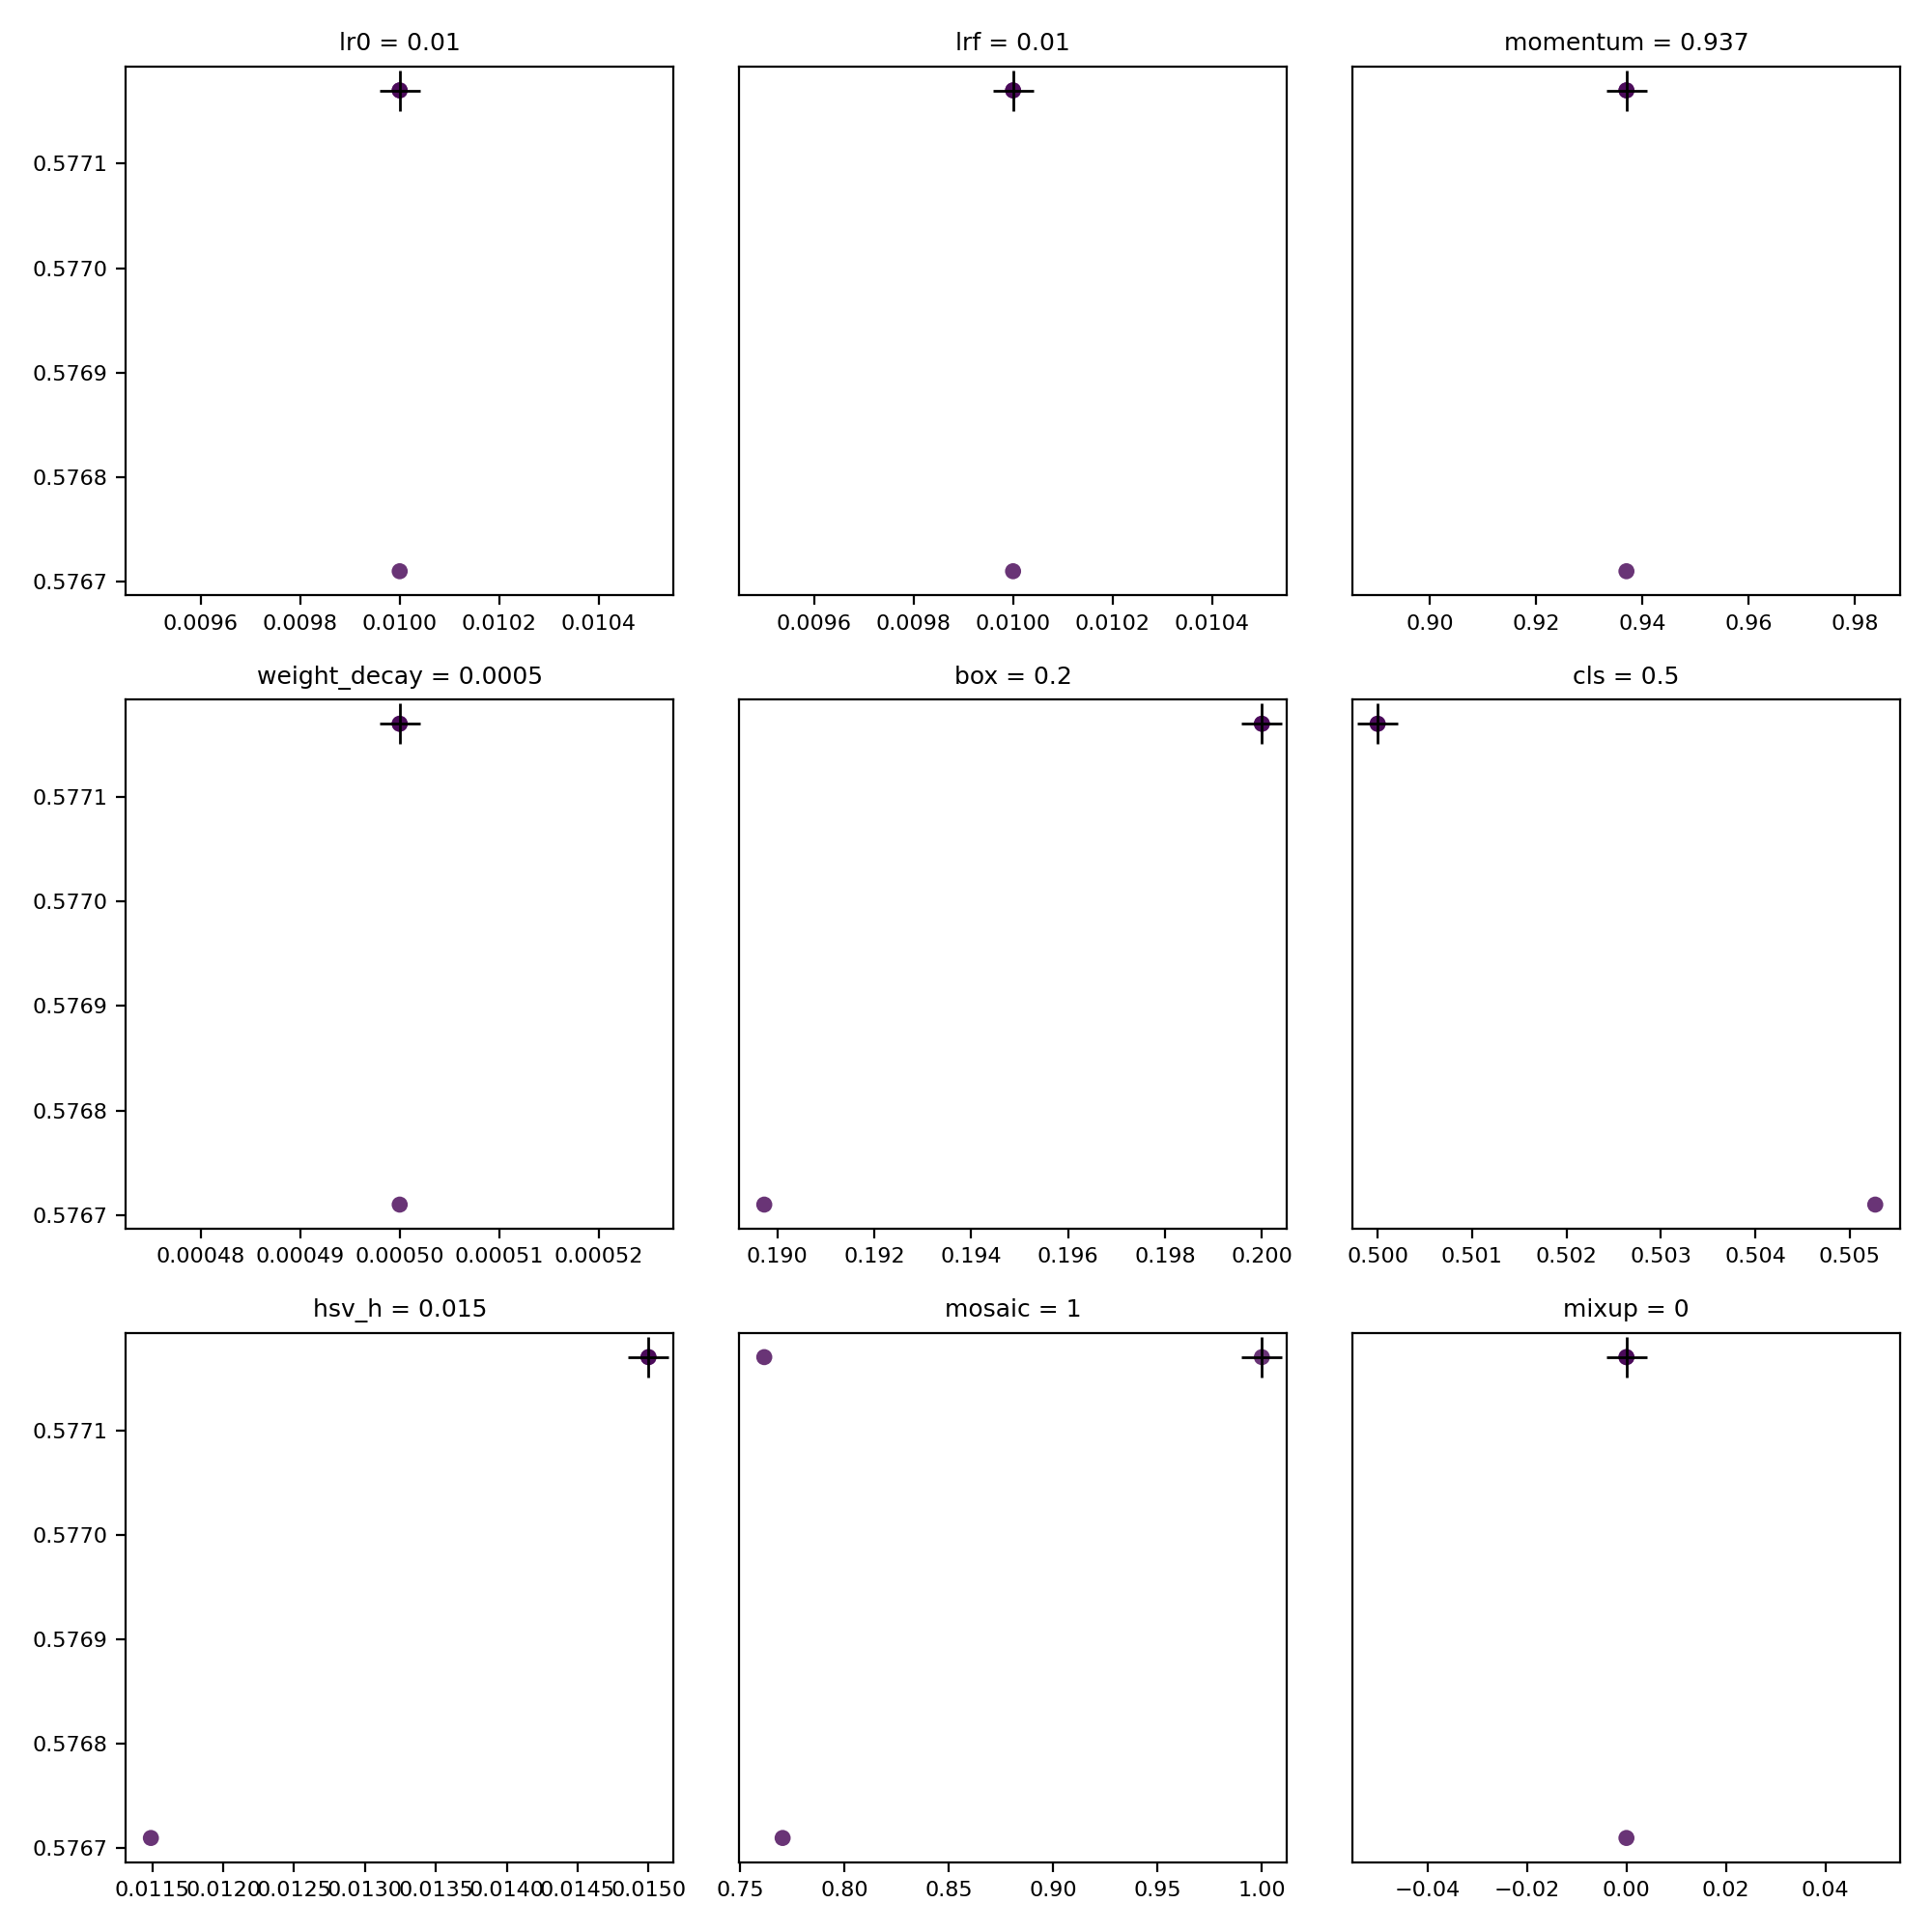

In [5]:
show_tuning_plots(SUMMARY_DIR)

In [6]:
print_tuning_csv(SUMMARY_DIR)


Tuning Results CSV (Top 5 runs):


,fitness,lr0,lrf,momentum,weight_decay,box,cls,hsv_h,mosaic,mixup
0,0.57717,0.01,0.01,0.937,0.0005,0.20000,0.50000,0.01500,1.00000,0.0
1,0.57717,0.01,0.01,0.937,0.0005,0.20000,0.50000,0.01500,0.76152,0.0
2,0.57671,0.01,0.01,0.937,0.0005,0.18973,0.50527,0.01149,0.77032,0.0



Scanning for training runs in: ../runs/yolov11l/tune


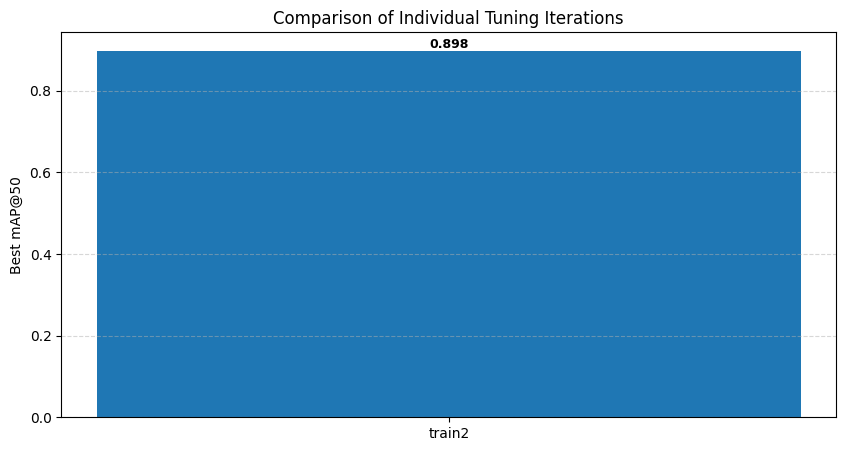

In [7]:
%matplotlib inline

from src.visualization import compare_tuning_runs

# Path to the PARENT folder (contains train, train2, train3)
ROOT_DIR = "../runs/yolov11l/tune"

compare_tuning_runs(ROOT_DIR)

In [8]:
print("\nRunning Final Evaluation on Test Set...")

from ultralytics import YOLO

model = YOLO("../runs/yolov11l/tune/tune_YOLO_yolo11l/weights/best.pt") 

# Run Validation on the TEST split
# We force split='test' so it uses the 'test' folder defined in your yaml
test_metrics = model.val(data=DATA_YAML, split='test')

# Extract & Print Key Metrics
# Ultralytics stores these in the .box attribute or results_dict
print("\n" + "="*30)
print("FINAL TEST SET RESULTS")
print("="*30)
print(f"Precision:   {test_metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall:      {test_metrics.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP@50:      {test_metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP@50-95:   {test_metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
print("="*30)


Running Final Evaluation on Test Set...
Ultralytics 8.3.235 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32110MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7162.5±943.7 MB/s, size: 1424.4 KB)
val: Scanning /workspace/dl4cv-final-project/data/datasets/thedatasith/sku110k-annotations/versions/14/SKU110K_fixed/labels/test.cache... 2920 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2920/2920 322.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 183/183 3.8it/s 47.7s
                   all       2920     429411      0.903      0.844      0.916      0.588
Speed: 0.6ms preprocess, 8.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /workspace/dl4cv-final-project/notebooks/runs/detect/val2

FINAL TEST SET RESULTS
Precision:   0.9030
Recall:      0.8436
mAP@50:      0.9158
mAP@50-95: